In [ ]:
# %pip install --upgrade s3fs 
%pip install numpy==1.26.4
import numpy as np
import pandas as pd

from sagemaker import get_execution_role
role = get_execution_role()

#Change these paths accordingly to where you store your data
bucket = 'halton-ubc'
# file_path = 'data/ED_UBC_20240531.csv'
file_path = 'data/ED_UBC_20240924_ImagingAdded.csv'

data_location = 's3://{}/{}'.format(bucket, file_path)

df = pd.read_csv(data_location, encoding = 'utf-8')
df.drop(['rowupdated'],axis=1,inplace=True)

Note: you may need to restart the kernel to use updated packages.


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[01/15/25 21:52:25] INFO     Found credentials from IAM Role:                                   ]8;id=472161;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=745913;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


[01/15/25 21:52:29] INFO     Found credentials from IAM Role:                                   ]8;id=789378;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=755186;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:279: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


[01/15/25 21:52:30] INFO     Found credentials from IAM Role:                                   ]8;id=493368;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=509457;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

/tmp/ipykernel_9651/3817594073.py:15: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_location, encoding = 'utf-8')


In [8]:
 print(pd. __version__) 


from platform import python_version

print(python_version())


1.5.3
3.10.16


In [2]:
df.head()

,V_GUID,EDVisit.AdmitDateTime,EDVisit.Age,EDVisit.Expired,EDVisit.Facility_MisFacID,EDVisit.RegistrationDateTime,EDVisit.Sex,TotalAdmitted,TotalEDVisit,EDAcctCanadianAbs.AmbulanceArrivalDateTime,...,Respiratory_Rate,Respiratory_Rate.DateTime,AmbulanceArrival,ImagingOrderWithin4Hours,MRI,InterventionalRadiology,CTScan,NuclearMedicine,Ultrasound,XRay
0,00002a02-fb5b-5606-8719-0216d8719fd4,NaN,55,NaN,MDH,2023-12-11 9:45,M,0,1,NaN,...,18.0,2023-12-11 9:36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00009fb8-a2b1-54a2-8d14-96f0d75bb0d1,2022-04-30 4:12,52,NaN,MDH,2022-04-29 22:00,M,1,1,NaN,...,22.0,2022-04-29 21:53,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000c606-b522-5484-ba10-30a3ec2d86a4,NaN,61,NaN,GDH,2022-05-07 8:04,M,0,1,NaN,...,14.0,2022-05-07 7:51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000e075-d00f-5eee-867c-7522fc16b382,NaN,31,NaN,OTMH,2024-02-12 21:43,M,0,1,NaN,...,18.0,2024-02-12 21:36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00010cff-b350-5e24-8d6e-a911cf74c404,2023-08-18 15:16,43,NaN,OTMH,2023-08-18 11:08,M,1,1,NaN,...,18.0,2023-08-18 10:57,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
df = df[df['EDVisit.Age']>=18]

In [4]:
df.dtypes

V_GUID                                         object
EDVisit.AdmitDateTime                          object
EDVisit.Age                                     int64
EDVisit.Expired                                object
EDVisit.Facility_MisFacID                      object
EDVisit.RegistrationDateTime                   object
EDVisit.Sex                                    object
TotalAdmitted                                   int64
TotalEDVisit                                    int64
EDAcctCanadianAbs.AmbulanceArrivalDateTime     object
EDAcctCanadianAbs.EdmComplaintName             object
EDAcctCanadianAbs.Priority_MisTriageID          int64
EDAcctCanadianAbs.StatedComplaint              object
EDAcctCanadianAbs.TriageDateTime               object
RegistrationDate                                int64
Blood_Pressure                                 object
Blood_Pressure.DateTime                        object
Capillary_Refill                               object
Capillary_Refill.DateTime   

In [5]:
df['EDAcctCanadianAbs.EdmComplaintName'].value_counts()

Abdominal Pain                             17372
Chest Pain (Cardiac Features)              13107
Lower Extremity Injury                      8125
Shortness of Breath                         7021
Upper Extremity Injury                      6984
                                           ...  
Multisystem Trauma - Penetrating               6
Rule Out Infestation                           5
Isolated Chest Trauma - Penetrating            4
Isolated Abdominal Trauma - Penetrating        2
Photophobia                                    1
Name: EDAcctCanadianAbs.EdmComplaintName, Length: 157, dtype: int64

In [6]:
np.unique(df['TotalAdmitted'],return_counts=True)

(array([0, 1]), array([155497,  21418]))

/tmp/ipykernel_13187/2124626510.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=percentages.values, palette="Blues_d", width=0.5)


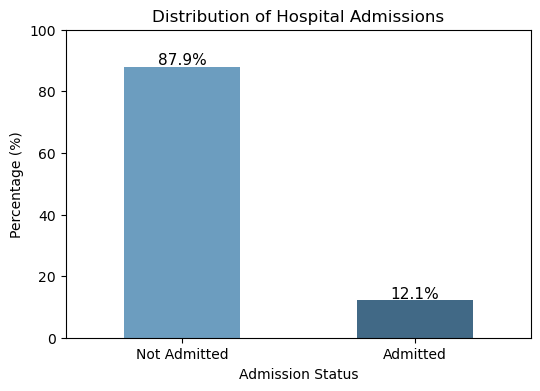

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of each category
total = len(df['TotalAdmitted'])
counts = df['TotalAdmitted'].value_counts()
percentages = counts / total * 100

# Rename the x-axis labels
labels = ['Not Admitted', 'Admitted']

# Plot the distribution with percentage annotations
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=labels, y=percentages.values, palette="Blues_d", width=0.5)

# Annotate the bars with percentages
for i, p in enumerate(ax.patches):
    ax.annotate(f'{percentages.values[i]:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=11, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Aesthetics
plt.title('Distribution of Hospital Admissions')
plt.xlabel('Admission Status')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()


In [8]:
df['EDVisit.RegistrationDateTime']

0          2023-12-11 9:45
1         2022-04-29 22:00
2          2022-05-07 8:04
3         2024-02-12 21:43
4         2023-08-18 11:08
                ...       
227070     2023-04-26 7:06
227071    2023-09-15 15:48
227073     2023-02-25 8:51
227074    2022-12-17 16:55
227075    2022-07-30 17:51
Name: EDVisit.RegistrationDateTime, Length: 176915, dtype: object

In [9]:
import pandas as pd

# Convert the 'EDVisit.RegistrationDateTime' column to a datetime format
df['EDVisit.RegistrationDateTime'] = pd.to_datetime(df['EDVisit.RegistrationDateTime'], format='%Y-%m-%d %H:%M')

# Extract year, month, day, and time into new columns
df['Registration Year'] = df['EDVisit.RegistrationDateTime'].dt.year
df['Registration Month'] = df['EDVisit.RegistrationDateTime'].dt.month
df['Registration Day'] = df['EDVisit.RegistrationDateTime'].dt.day
df['Registration Time'] = df['EDVisit.RegistrationDateTime'].dt.time

# Display the dataframe with the new columns
print(df[['EDVisit.RegistrationDateTime', 'Registration Year', 'Registration Month', 'Registration Day', 'Registration Time']])


       EDVisit.RegistrationDateTime  Registration Year  Registration Month  \
0               2023-12-11 09:45:00               2023                  12   
1               2022-04-29 22:00:00               2022                   4   
2               2022-05-07 08:04:00               2022                   5   
3               2024-02-12 21:43:00               2024                   2   
4               2023-08-18 11:08:00               2023                   8   
...                             ...                ...                 ...   
227070          2023-04-26 07:06:00               2023                   4   
227071          2023-09-15 15:48:00               2023                   9   
227073          2023-02-25 08:51:00               2023                   2   
227074          2022-12-17 16:55:00               2022                  12   
227075          2022-07-30 17:51:00               2022                   7   

        Registration Day Registration Time  
0                 

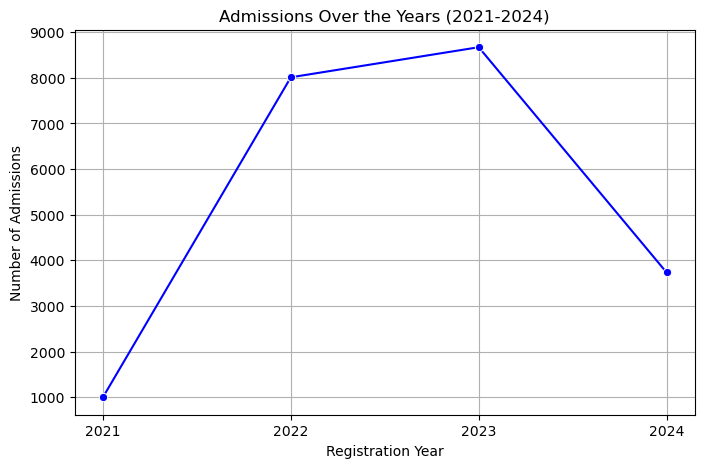

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Registration Year' and count the number of admissions for each year
yearly_admissions = df.groupby('Registration Year')['TotalAdmitted'].sum().reset_index()

# Plot the number of admissions over the years
plt.figure(figsize=(8, 5))
sns.lineplot(x='Registration Year', y='TotalAdmitted', data=yearly_admissions, marker='o', color='b')

# Add labels and title
plt.title('Admissions Over the Years (2021-2024)')
plt.xlabel('Registration Year')
plt.ylabel('Number of Admissions')
plt.xticks([2021, 2022, 2023, 2024])  # Ensure only relevant years are displayed
plt.grid(True)

# Show the plot
plt.show()


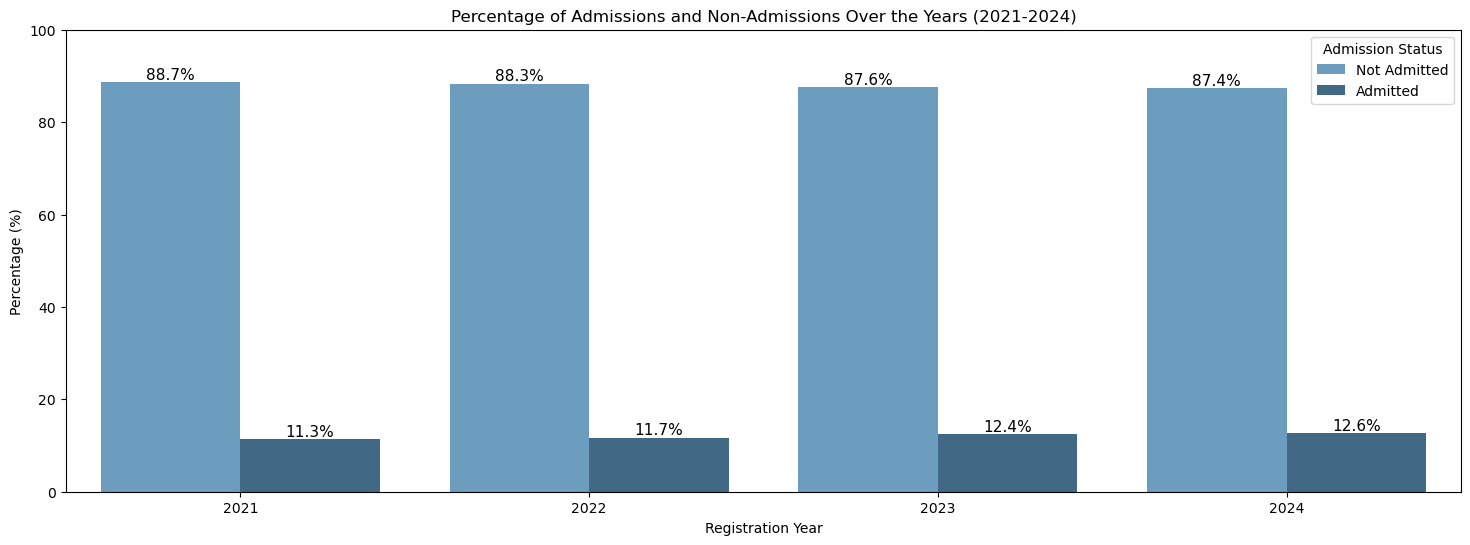

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Registration Year' and 'TotalAdmitted' and count the occurrences
yearly_counts = df.groupby(['Registration Year', 'TotalAdmitted']).size().unstack(fill_value=0)

# Calculate the percentage of each category for each year
yearly_percentages = yearly_counts.div(yearly_counts.sum(axis=1), axis=0) * 100

# Reset the index for plotting
yearly_percentages = yearly_percentages.reset_index()

# Rename columns for clarity
yearly_percentages.columns = ['Registration Year', 'Not Admitted', 'Admitted']

# Melt the dataframe for easier plotting with seaborn
yearly_percentages_melted = yearly_percentages.melt(id_vars='Registration Year', 
                                                    value_vars=['Not Admitted', 'Admitted'], 
                                                    var_name='Admission Status', 
                                                    value_name='Percentage')

# Plot the grouped bar plot
plt.figure(figsize=(18, 6))
ax = sns.barplot(x='Registration Year', y='Percentage', hue='Admission Status', 
                 data=yearly_percentages_melted, palette='Blues_d')

# Annotate bars with percentages
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    if percentage == '0.0%':
        continue
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11, color='black')

# Add labels and title
plt.title('Percentage of Admissions and Non-Admissions Over the Years (2021-2024)')
plt.xlabel('Registration Year')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend(title='Admission Status')

# Show the plot
plt.show()


[2023 2022 2024 2021]
2021     8833
2022    68562
2023    69970
2024    29550
Name: Registration Year, dtype: int64


/tmp/ipykernel_13187/310299217.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_patient_counts.index, y=yearly_patient_counts.values, palette='Blues_d')


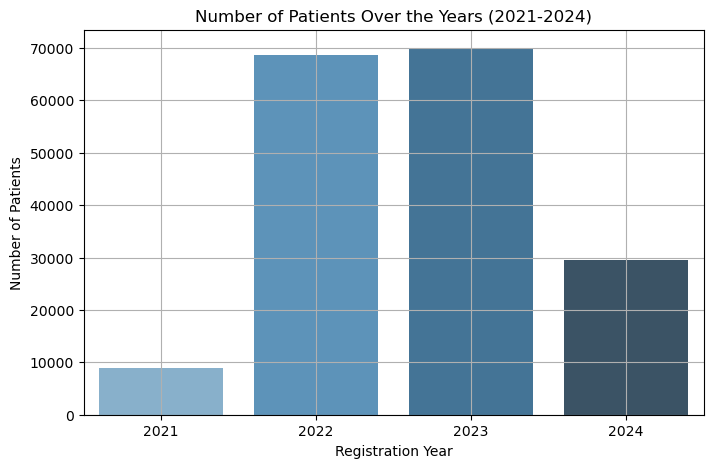

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check the 'Registration Year' column to ensure it contains the correct data
print(df['Registration Year'].unique())

# Group the data by 'Registration Year' and count the number of patients
yearly_patient_counts = df['Registration Year'].value_counts().sort_index()

# Check the grouped data
print(yearly_patient_counts)

# Plot the number of patients over the years
plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_patient_counts.index, y=yearly_patient_counts.values, palette='Blues_d')

# Set line width for the bars
for bar in ax.patches:
    bar.set_edgecolor('black')  # Set edge color to black for better visibility
    bar.set_linewidth(2.5)  # Adjust line width for thicker bars

# Add labels and title
plt.title('Number of Patients Over the Years (2021-2024)')
plt.xlabel('Registration Year')
plt.ylabel('Number of Patients')
plt.grid(True)

# Automatically adjust x-ticks
ax.set_xticks(yearly_patient_counts.index)  # Ensure the x-ticks are correctly set to the years
ax.set_xticklabels(yearly_patient_counts.index)  # Set x-tick labels to the years

# Show the plot
plt.show()


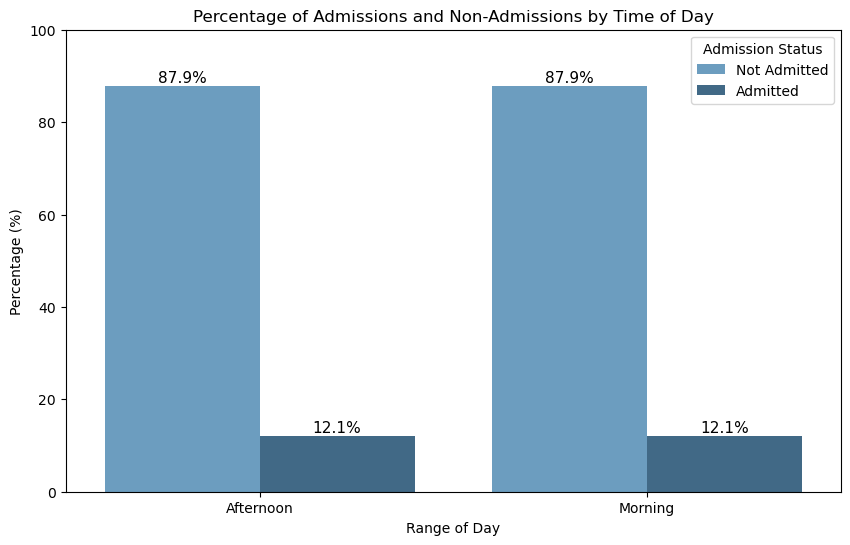

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'Registration Time' to string format if it's not already
df['Registration Time'] = df['Registration Time'].astype(str)

# Define a function to parse time and categorize into 'Morning' or 'Afternoon'
def categorize_time(time_str):
    try:
        # Parse the time using the format '%H:%M:%S'
        time_obj = datetime.strptime(time_str, '%H:%M:%S').time()
#         print(time_obj)
    except ValueError:
        # Handle cases where parsing fails
        print("failing")
        return None
    
    # Categorize time based on hour
    if time_obj.hour < 12:
        return 'Morning'
    else:
        return 'Afternoon'

# Apply the function to create a new column 'Time of Day'
df['Range of Day'] = df['Registration Time'].apply(categorize_time)

# Drop rows where 'Time of Day' is None (invalid times)
df = df.dropna(subset=['Range of Day'])


# Group the data by 'Time of Day' and 'TotalAdmitted' and count the occurrences
time_admissions_counts = df.groupby(['Range of Day', 'TotalAdmitted']).size().unstack(fill_value=0)

# Calculate the percentage of each category for each time of day
time_admissions_percentages = time_admissions_counts.div(time_admissions_counts.sum(axis=1), axis=0) * 100

# Reset the index for plotting
time_admissions_percentages = time_admissions_percentages.reset_index()

# Rename columns for clarity
time_admissions_percentages.columns = ['Range of Day', 'Not Admitted', 'Admitted']

# Melt the dataframe for easier plotting with seaborn
time_admissions_melted = time_admissions_percentages.melt(id_vars='Range of Day', 
                                                          value_vars=['Not Admitted', 'Admitted'], 
                                                          var_name='Admission Status', 
                                                          value_name='Percentage')

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Range of Day', y='Percentage', hue='Admission Status', 
                 data=time_admissions_melted, palette='Blues_d')

# Annotate bars with percentages
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    if percentage == '0.0%':
        continue
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11, color='black')

# Add labels and title
plt.title('Percentage of Admissions and Non-Admissions by Time of Day')
plt.xlabel('Range of Day')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend(title='Admission Status')

# Show the plot
plt.show()


In [14]:
df.head()

,V_GUID,EDVisit.AdmitDateTime,EDVisit.Age,EDVisit.Expired,EDVisit.Facility_MisFacID,EDVisit.RegistrationDateTime,EDVisit.Sex,TotalAdmitted,TotalEDVisit,EDAcctCanadianAbs.AmbulanceArrivalDateTime,...,InterventionalRadiology,CTScan,NuclearMedicine,Ultrasound,XRay,Registration Year,Registration Month,Registration Day,Registration Time,Range of Day
0,00002a02-fb5b-5606-8719-0216d8719fd4,NaN,55,NaN,MDH,2023-12-11 09:45:00,M,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,2023,12,11,09:45:00,Morning
1,00009fb8-a2b1-54a2-8d14-96f0d75bb0d1,2022-04-30 4:12,52,NaN,MDH,2022-04-29 22:00:00,M,1,1,NaN,...,0.0,1.0,0.0,0.0,0.0,2022,4,29,22:00:00,Afternoon
2,0000c606-b522-5484-ba10-30a3ec2d86a4,NaN,61,NaN,GDH,2022-05-07 08:04:00,M,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,2022,5,7,08:04:00,Morning
3,0000e075-d00f-5eee-867c-7522fc16b382,NaN,31,NaN,OTMH,2024-02-12 21:43:00,M,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,2024,2,12,21:43:00,Afternoon
4,00010cff-b350-5e24-8d6e-a911cf74c404,2023-08-18 15:16,43,NaN,OTMH,2023-08-18 11:08:00,M,1,1,NaN,...,0.0,1.0,0.0,0.0,0.0,2023,8,18,11:08:00,Morning


In [15]:
df.set_index('V_GUID',inplace=True)

In [16]:
df.dtypes

EDVisit.AdmitDateTime                                 object
EDVisit.Age                                            int64
EDVisit.Expired                                       object
EDVisit.Facility_MisFacID                             object
EDVisit.RegistrationDateTime                  datetime64[ns]
EDVisit.Sex                                           object
TotalAdmitted                                          int64
TotalEDVisit                                           int64
EDAcctCanadianAbs.AmbulanceArrivalDateTime            object
EDAcctCanadianAbs.EdmComplaintName                    object
EDAcctCanadianAbs.Priority_MisTriageID                 int64
EDAcctCanadianAbs.StatedComplaint                     object
EDAcctCanadianAbs.TriageDateTime                      object
RegistrationDate                                       int64
Blood_Pressure                                        object
Blood_Pressure.DateTime                               object
Capillary_Refill        

In [17]:
df.drop(['Registration Time'], axis = 1, inplace = True)

In [18]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_object_dtype
cat_columns = []
for series_name, series in df.items():
    print(series_name)
#     if 'Time' in series_name and not is_datetime(series.dtype):
    if 'Time' in series_name:
        df[series_name]= pd.to_datetime(df[series_name]).astype(int)
    if is_object_dtype(series.dtype):
        cat_columns.append(series_name)
df[cat_columns] = df[cat_columns].astype('category').apply(lambda x: x.cat.codes)

EDVisit.AdmitDateTime
EDVisit.Age
EDVisit.Expired
EDVisit.Facility_MisFacID
EDVisit.RegistrationDateTime
EDVisit.Sex
TotalAdmitted
TotalEDVisit
EDAcctCanadianAbs.AmbulanceArrivalDateTime
EDAcctCanadianAbs.EdmComplaintName
EDAcctCanadianAbs.Priority_MisTriageID
EDAcctCanadianAbs.StatedComplaint
EDAcctCanadianAbs.TriageDateTime
RegistrationDate
Blood_Pressure
Blood_Pressure.DateTime
Capillary_Refill
Capillary_Refill.DateTime
Glasgow_Coma_Scale
Glasgow_Coma_Scale.DateTime
Pain_Severity_Scale
Pain_Severity_Scale.DateTime
Pulse_Oximetry
Pulse_Oximetry.DateTime
Pulse_Rate
Pulse_Rate.DateTime
Temperature
Temperature.DateTime
Respiratory_Rate
Respiratory_Rate.DateTime
AmbulanceArrival
ImagingOrderWithin4Hours
MRI
InterventionalRadiology
CTScan
NuclearMedicine
Ultrasound
XRay
Registration Year
Registration Month
Registration Day
Range of Day


In [19]:
## Make new columns

In [20]:
# df['Capillary_Refill'].head(10000)

In [21]:
import pandas as pd
import numpy as np

# Assuming your data is in a DataFrame called 'df'

# Capillary Refill
df['Abnormal_Capillary_Refill'] = np.where(df['Capillary_Refill'] > 2, 2, 
                                            np.where(df['Capillary_Refill'] < 2, 1, np.nan))

# Glasgow Coma Scale
df['Glasgow_Coma_Scale_Severe'] = np.where(df['Glasgow_Coma_Scale'] < 9, 2, 
                                            np.where((df['Glasgow_Coma_Scale'] >= 9) & (df['Glasgow_Coma_Scale'] <= 11), 1, 
                                                     np.where(df['Glasgow_Coma_Scale'] >= 12, 0, np.nan)))
# Handle impossible values
df.loc[(df['Glasgow_Coma_Scale'] < 3) | (df['Glasgow_Coma_Scale'] > 15), 'Glasgow_Coma_Scale_Severe'] = np.nan
df.loc[(df['Glasgow_Coma_Scale'] < 3) | (df['Glasgow_Coma_Scale'] > 15), 'Glasgow_Coma_Scale'] = np.nan

# Pain Severity Scale
df['Severe_Pain'] = np.where(df['Pain_Severity_Scale'] > 6, 2, 
                              np.where(df['Pain_Severity_Scale'] <= 6, 1, np.nan))

# Handle impossible values
df.loc[df['Pain_Severity_Scale'] > 10, 'Severe_Pain'] = np.nan
df.loc[df['Pain_Severity_Scale'] > 10, 'Pain_Severity_Scale'] = np.nan

# Pulse Oximetry
df['Abnormal_Pulse_Oximetry'] = np.where(df['Pulse_Oximetry'] < 88, 2, 
                                          np.where((df['Pulse_Oximetry'] > 88) & (df['Pulse_Oximetry'] <= 97), 1, 
                                                   np.where(df['Pulse_Oximetry'] >= 98, 0, np.nan)))

# Handle impossible values
df.loc[df['Pulse_Oximetry'] > 100, 'Abnormal_Pulse_Oximetry'] = np.nan
df.loc[df['Pulse_Oximetry'] > 100, 'Pulse_Oximetry'] = np.nan

# High Pulse Rate
df['High_Pulse_Rate'] = np.where(df['Pulse_Rate'] > 100, 2, 
                                  np.where(df['Pulse_Rate'] <= 100, 1, np.nan))

# Handle impossible values
df.loc[df['Pulse_Rate'] > 300, 'High_Pulse_Rate'] = np.nan
df.loc[df['Pulse_Rate'] > 300, 'Pulse_Rate'] = np.nan

# Low Pulse Rate
df['Low_Pulse_Rate'] = np.where(df['Pulse_Rate'] < 60, 2, 
                                 np.where(df['Pulse_Rate'] >= 60, 1, np.nan))

# Handle impossible values
df.loc[df['Pulse_Rate'] < 0, 'Low_Pulse_Rate'] = np.nan
df.loc[df['Pulse_Rate'] < 0, 'Pulse_Rate'] = np.nan

# Fever
df['Fever'] = np.where(df['Temperature'] > 38.1, 2, 
                        np.where((df['Temperature'] > 37.3) & (df['Temperature'] <= 38.1), 1, 
                                 np.where(df['Temperature'] <= 37.2, 0, np.nan)))

# Handle impossible values
df.loc[df['Temperature'] > 48, 'Fever'] = np.nan
df.loc[df['Temperature'] > 48, 'Temperature'] = np.nan

# Hypothermia
df['Hypothermia'] = np.where(df['Temperature'] < 35, 2, 
                              np.where((df['Temperature'] >= 35) & (df['Temperature'] <= 35.4), 1, 
                                       np.where(df['Temperature'] >= 35.5, 0, np.nan)))

# Handle impossible values
df.loc[df['Temperature'] < 4, 'Hypothermia'] = np.nan
df.loc[df['Temperature'] < 4, 'Temperature'] = np.nan

# High Respiratory Rate
df['High_Respiratory_Rate'] = np.where(df['Respiratory_Rate'] > 24, 2, 
                                        np.where(df['Respiratory_Rate'] > 18, 1, 
                                                 np.where(df['Respiratory_Rate'] <= 18, 0, np.nan)))

# Handle impossible values
df.loc[df['Respiratory_Rate'] > 100, 'High_Respiratory_Rate'] = np.nan
df.loc[df['Respiratory_Rate'] > 100, 'Respiratory_Rate'] = np.nan

# Display the processed DataFrame
df.head()


,EDVisit.AdmitDateTime,EDVisit.Age,EDVisit.Expired,EDVisit.Facility_MisFacID,EDVisit.RegistrationDateTime,EDVisit.Sex,TotalAdmitted,TotalEDVisit,EDAcctCanadianAbs.AmbulanceArrivalDateTime,EDAcctCanadianAbs.EdmComplaintName,...,Range of Day,Abnormal_Capillary_Refill,Glasgow_Coma_Scale_Severe,Severe_Pain,Abnormal_Pulse_Oximetry,High_Pulse_Rate,Low_Pulse_Rate,Fever,Hypothermia,High_Respiratory_Rate
V_GUID,,,,,,,,,,,,,,,,,,,,,
00002a02-fb5b-5606-8719-0216d8719fd4,0,55,-1,1,1702287900000000000,1,0,1,0,21,...,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
00009fb8-a2b1-54a2-8d14-96f0d75bb0d1,3741,52,-1,1,1651269600000000000,1,1,1,0,58,...,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
0000c606-b522-5484-ba10-30a3ec2d86a4,0,61,-1,0,1651910640000000000,1,0,1,0,131,...,1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
0000e075-d00f-5eee-867c-7522fc16b382,0,31,-1,2,1707774180000000000,1,0,1,0,21,...,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
00010cff-b350-5e24-8d6e-a911cf74c404,15088,43,-1,2,1692356880000000000,1,1,1,0,1,...,1,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0


In [22]:
df.dtypes

EDVisit.AdmitDateTime                           int16
EDVisit.Age                                     int64
EDVisit.Expired                                  int8
EDVisit.Facility_MisFacID                        int8
EDVisit.RegistrationDateTime                    int64
EDVisit.Sex                                      int8
TotalAdmitted                                   int64
TotalEDVisit                                    int64
EDAcctCanadianAbs.AmbulanceArrivalDateTime      int16
EDAcctCanadianAbs.EdmComplaintName              int16
EDAcctCanadianAbs.Priority_MisTriageID          int64
EDAcctCanadianAbs.StatedComplaint               int32
EDAcctCanadianAbs.TriageDateTime                int32
RegistrationDate                                int64
Blood_Pressure                                  int16
Blood_Pressure.DateTime                         int32
Capillary_Refill                                 int8
Capillary_Refill.DateTime                       int32
Glasgow_Coma_Scale          

In [23]:
miss_knn_columns = []
miss_mean_columns = [i for i in df.columns if df[i].isnull().any()]


In [24]:
%pip install imbalanced-learn  
%pip install xgboost
# %python -m pip install imbalanced-learn==0.7.0

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
#%pip install imbalanced-learn  
# python -m pip install imbalanced-learn==0.7.0
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score

def model_train(m, parameters, is_tree=False, is_rf=False, data_df=None):
    print("Starting Training with ", m)
    y = data_df['TotalAdmitted'].values
    x_data = data_df.drop(data_df.filter(regex="post"), axis=1)
    x_data.drop(['TotalAdmitted', 'EDVisit.AdmitDateTime', 'EDVisit.Expired'], axis=1, inplace=True)

    # Custom imputation for specific variables
    def custom_impute(df):
        print("Applying custom imputations...")

        # Null = ZERO rules
        zero_cols = [
            "Blood_Pressure", "Pulse_Oximetry", "Pulse_Rate", "Temperature", "Respiratory_Rate"
        ]
        df[zero_cols] = df[zero_cols].fillna(0)

        # Null = ZERO IF ALL OTHER VITALS ARE NULL, ELSE MEDIAN for Glasgow_Coma_Scale
        vital_cols = zero_cols + ["Glasgow_Coma_Scale"]
        df["Glasgow_Coma_Scale"] = df["Glasgow_Coma_Scale"].where(
            ~df[vital_cols].isnull().all(axis=1), 0
        )
        df["Glasgow_Coma_Scale"].fillna(df["Glasgow_Coma_Scale"].median(), inplace=True)

        # Median imputation for Capillary_Refill and Pain_Severity_Scale
        median_cols = ["Capillary_Refill", "Pain_Severity_Scale"]
        for col in median_cols:
            df[col].fillna(df[col].median(), inplace=True)

        # Triage DateTime imputation for related DateTime columns
        datetime_cols = [
            "Blood_Pressure.DateTime",
            "Capillary_Refill.DateTime",
            "Glasgow_Coma_Scale.DateTime",
            "Pain_Severity_Scale.DateTime",
            "Pulse_Oximetry.DateTime",
            "Pulse_Rate.DateTime",
            "Temperature.DateTime",
            "Respiratory_Rate.DateTime",
        ]
        for col in datetime_cols:
            df[col].fillna(df["EDAcctCanadianAbs.TriageDateTime"], inplace=True)

        return df

    x = custom_impute(x_data)

    # Store outputs
    cf = []
    fis = []
    aucs = []

    print(x.shape)
    print(y.shape)

    # Cross-validation
    for rs in [1, 2, 3, 4, 5]:
        skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=rs)
        skf.get_n_splits(x, y)
        for train_index, test_index in skf.split(np.zeros(x.shape[0]), y):
            print(train_index)
            x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
            y_train, y_test = y[train_index], y[test_index]

            # Drop columns with all nulls in training
            empty_train_columns = [
                col for col in x_train.columns if x_train[col].isnull().all()
            ]
            imputed_train_columns = [
                col for col in x_train.columns if col not in empty_train_columns
            ]
            print("Empty training columns - ", empty_train_columns)

            # Impute missing data using median for remaining columns
            imp_mean = SimpleImputer(missing_values=np.nan, strategy="median")
            imp_mean_x_train = pd.DataFrame(
                imp_mean.fit_transform(x_train), index=x_train.index, columns=imputed_train_columns
            )
            print("Imputed median of remaining values x_train")
            imp_mean_x_test = pd.DataFrame(
                imp_mean.transform(x_test), index=x_test.index, columns=imputed_train_columns
            )
            print("Imputed median of remaining values x_test")

            # Merge imputed columns back into original dataframes
            for col in imputed_train_columns:
                x_train[col] = imp_mean_x_train[col]
                x_test[col] = imp_mean_x_test[col]

            # SMOTE for resampling
            over = SMOTE()
            under = RandomUnderSampler()
            steps = [("o", over), ("u", under)]
            pipeline = Pipeline(steps=steps)
            print(x_train.isna().sum())
            x_train, y_train = pipeline.fit_resample(x_train, y_train)

            # Model fitting
            model = clone(m)
            clf = GridSearchCV(model, parameters, cv=5)
            clf.fit(x_train, y_train)

            # Best model and evaluation
            model = clf.best_estimator_
            result = permutation_importance(
                model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=1
            )
            feature_importances = pd.DataFrame(
                result.importances_mean, index=x_test.columns, columns=["importance"]
            ).sort_values("importance", ascending=False)

            print(feature_importances.head(20))
            fis.append(feature_importances)

            y_pred = clf.predict(x_test)
            matrix = confusion_matrix(y_test, y_pred)
            cf.append(matrix)
            print("Best params")
            print(clf.best_estimator_.get_params())
            print("Accuracy: ", (np.trace(matrix)) / matrix.sum() * 100)
            auc = roc_auc_score(y_test, y_pred)
            aucs.append(auc)

    # Aggregate feature importances and AUCs
    df_concat = pd.concat(fis)
    print(df_concat.groupby(level=0).mean().sort_values("importance", ascending=False))
    cf.append(df_concat.groupby(level=0).mean().sort_values("importance", ascending=False))
    cf.append(aucs)
    return cf



def output_metrics(matrices,fis,aucs):
    average_matrix=np.mean(matrices,axis=0)
    class_accs = []
    ov_accs=[]
    for matrix in matrices:
        c = []
        ov_acc = (np.trace(matrix))/matrix.sum()*100
        ov_accs.append(ov_acc)
        for i in range(2):
            c.append((matrix[i][i]/matrix[i].sum()*100))
        class_accs.append(c)
    class_acc=np.mean(class_accs,axis=0)
    ov_accs=np.mean(ov_accs,axis=0)
    print("Overall Accuracy :",ov_accs)
    print("Class Accuracy for Low Risk",class_acc[0])
    print("Class Accuracy for High Risk",class_acc[1])
    print('Feature Importances',fis.head(10))
    ##Updated add AUCs
    print('AUCs', aucs)
    return([matrices,fis,ov_accs,class_acc[0],class_acc[1]],np.mean(aucs))

def c_thresholds(fold_tests,fold_preds,t=0.5):
    matrices=[]
    print('fp length', len(fold_preds))
    for fold_ind in range(len(fold_tests)):
        fold_pred=fold_preds[fold_ind]
        fold_test=fold_tests[fold_ind]
        fp=[]
        for pred in fold_pred:
            print(pred[0]/pred.sum())
            if pred[0]/pred.sum() >= t:
                fp.append(0)
            else:
                fp.append(1)
        matrices.append(confusion_matrix(fold_test,fp))
#         print(fold_pred)
    return matrices

In [26]:


time_graphs={}
test_version = 'final_version'
# test_version = 'new-age-filter-imaging-full-5-runs'
# test_version = 'test2-ten-percent'
r = 1.0

In [27]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold  # SS: Added this
import pickle 
parameters={}
m = model_train(DummyClassifier(strategy="stratified"),parameters,data_df = df[:int(r*len(df))])
matrices=m[:-2]
fis=m[-2]
aucs=m[-1]
time_graphs['Baseline']=output_metrics(matrices,fis,aucs)
with open('./results/'+'Baseline'+'_'+test_version+'.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(time_graphs['Baseline'], file)

Starting Training with  DummyClassifier(strategy='stratified')
Applying custom imputations...
(176915, 48)
(176915,)
[     0      1      2 ... 176911 176912 176914]
Empty training columns -  []
Imputed median of remaining values x_train
Imputed median of remaining values x_test
EDVisit.Age                                   0
EDVisit.Facility_MisFacID                     0
EDVisit.RegistrationDateTime                  0
EDVisit.Sex                                   0
TotalEDVisit                                  0
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0
EDAcctCanadianAbs.EdmComplaintName            0
EDAcctCanadianAbs.Priority_MisTriageID        0
EDAcctCanadianAbs.StatedComplaint             0
EDAcctCanadianAbs.TriageDateTime              0
RegistrationDate                              0
Blood_Pressure                                0
Blood_Pressure.DateTime                       0
Capillary_Refill                              0
Capillary_Refill.DateTime                     0
G

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Pulse_Rate                                    0.002672
XRay                                          0.001872
Pain_Severity_Scale                           0.001452
Respiratory_Rate                              0.001397
EDVisit.Age                                   0.001171
Range of Day                                  0.001117
Pulse_Oximetry.DateTime                       0.001112
AmbulanceArrival                              0.000931
Registration Month                            0.000913
Abnormal_Pulse_Oximetry                       0.000873
Registration Year                             0.000868
Temperature                                   0.000733
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000624
High_Respiratory_Rate                         0.000506
EDAcctCanadianAbs.Priority_MisTriageID        0.000330
Hypothermia                                   0.000145
Glasgow_Coma_Scale                            0.000059
Registrati

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
NuclearMedicine                               0.001831
Range of Day                                  0.001248
Blood_Pressure.DateTime                       0.000950
Abnormal_Capillary_Refill                     0.000931
Temperature.DateTime                          0.000511
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000371
AmbulanceArrival                              0.000348
Capillary_Refill.DateTime                     0.000321
Capillary_Refill                              0.000253
Pain_Severity_Scale.DateTime                  0.000176
EDAcctCanadianAbs.StatedComplaint             0.000167
Pulse_Oximetry                                0.000095
Respiratory_Rate                              0.000072
Pulse_Oximetry.DateTime                       0.000063
Pain_Severity_Scale                           0.000045
EDAcctCanadianAbs.EdmComplaintName           -0.000036
Hypothermia                                  -0.000226
ImagingOrd

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                              importance
ImagingOrderWithin4Hours        0.000163
Blood_Pressure                  0.000041
Ultrasound                     -0.000009
Glasgow_Coma_Scale             -0.000172
Blood_Pressure.DateTime        -0.000556
Abnormal_Capillary_Refill      -0.000651
Pulse_Oximetry.DateTime        -0.000687
Respiratory_Rate.DateTime      -0.000760
InterventionalRadiology        -0.000809
AmbulanceArrival               -0.000950
Hypothermia                    -0.001121
NuclearMedicine                -0.001185
CTScan                         -0.001230
Range of Day                   -0.001234
Temperature                    -0.001393
Fever                          -0.001456
Pulse_Rate                     -0.001461
EDVisit.RegistrationDateTime   -0.001465
Pulse_Oximetry                 -0.001556
Pain_Severity_Scale            -0.001601
Best params
{'constant': None, 'random_state': None, 'strategy': 'stratified'}
Accuracy:  50.11530635315397
[     0      1      2 ... 17691

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Registration Day                              0.008113
Pulse_Oximetry.DateTime                       0.006828
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.006824
Severe_Pain                                   0.006462
EDVisit.RegistrationDateTime                  0.006367
High_Respiratory_Rate                         0.006263
RegistrationDate                              0.005883
Temperature.DateTime                          0.005847
Glasgow_Coma_Scale.DateTime                   0.005833
ImagingOrderWithin4Hours                      0.005806
Ultrasound                                    0.005725
TotalEDVisit                                  0.005648
Abnormal_Capillary_Refill                     0.005621
MRI                                           0.005616
EDAcctCanadianAbs.TriageDateTime              0.005616
Registration Year                             0.005517
NuclearMedicine                               0.005481
Pulse_Rate

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Capillary_Refill.DateTime                    -0.000317
Abnormal_Pulse_Oximetry                      -0.001578
EDVisit.RegistrationDateTime                 -0.001578
EDAcctCanadianAbs.AmbulanceArrivalDateTime   -0.001755
Registration Year                            -0.001840
High_Respiratory_Rate                        -0.001854
MRI                                          -0.001886
Range of Day                                 -0.001895
Fever                                        -0.001926
Registration Day                             -0.002012
EDVisit.Facility_MisFacID                    -0.002012
Respiratory_Rate                             -0.002035
Pulse_Rate.DateTime                          -0.002062
Respiratory_Rate.DateTime                    -0.002166
Registration Month                           -0.002184
Pain_Severity_Scale                          -0.002297
High_Pulse_Rate                              -0.002360
EDVisit.Se

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                        importance
Abnormal_Capillary_Refill                 0.002333
NuclearMedicine                           0.002279
Abnormal_Pulse_Oximetry                   0.002220
Capillary_Refill                          0.001393
MRI                                       0.001239
Severe_Pain                               0.001203
Respiratory_Rate.DateTime                 0.001198
Pulse_Rate                                0.001180
EDVisit.Sex                               0.001176
CTScan                                    0.001153
High_Pulse_Rate                           0.000999
Range of Day                              0.000990
EDAcctCanadianAbs.Priority_MisTriageID    0.000963
Capillary_Refill.DateTime                 0.000764
Registration Month                        0.000475
EDVisit.Age                               0.000412
EDAcctCanadianAbs.EdmComplaintName        0.000389
Pain_Severity_Scale                       0.000380
Glasgow_Coma_Scale_Severe      

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Pain_Severity_Scale                           0.003590
InterventionalRadiology                       0.002736
Temperature                                   0.002139
Ultrasound                                    0.002035
Abnormal_Capillary_Refill                     0.002035
EDVisit.RegistrationDateTime                  0.001913
Range of Day                                  0.001863
Pulse_Rate                                    0.001700
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.001651
AmbulanceArrival                              0.001470
MRI                                           0.001433
RegistrationDate                              0.001348
Temperature.DateTime                          0.001316
Hypothermia                                   0.001316
EDVisit.Sex                                   0.001257
XRay                                          0.000968
EDVisit.Age                                   0.000918
Fever     

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                    importance
Capillary_Refill                      0.007113
Pulse_Oximetry                        0.006254
Respiratory_Rate.DateTime             0.006227
Registration Year                     0.006005
Pulse_Oximetry.DateTime               0.005919
Glasgow_Coma_Scale.DateTime           0.005752
Pain_Severity_Scale.DateTime          0.005725
EDVisit.Age                           0.005707
Temperature.DateTime                  0.005598
EDVisit.Sex                           0.005377
AmbulanceArrival                      0.005363
CTScan                                0.005359
Range of Day                          0.005331
Temperature                           0.005327
InterventionalRadiology               0.005318
MRI                                   0.005304
High_Respiratory_Rate                 0.005291
EDAcctCanadianAbs.EdmComplaintName    0.005264
NuclearMedicine                       0.005246
EDAcctCanadianAbs.StatedComplaint     0.005232
Best params
{

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                    importance
EDAcctCanadianAbs.EdmComplaintName   -0.002274
MRI                                  -0.002284
Glasgow_Coma_Scale_Severe            -0.002320
Capillary_Refill                     -0.002369
Fever                                -0.002460
Respiratory_Rate.DateTime            -0.002519
High_Respiratory_Rate                -0.002636
Severe_Pain                          -0.002975
Ultrasound                           -0.003070
High_Pulse_Rate                      -0.003120
Temperature.DateTime                 -0.003174
XRay                                 -0.003179
Capillary_Refill.DateTime            -0.003201
Range of Day                         -0.003256
Pain_Severity_Scale                  -0.003256
Glasgow_Coma_Scale.DateTime          -0.003256
EDAcctCanadianAbs.TriageDateTime     -0.003287
Registration Month                   -0.003346
Pain_Severity_Scale.DateTime         -0.003418
Hypothermia                          -0.003536
Best params
{

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                        importance
Capillary_Refill.DateTime                 0.001827
Temperature                               0.001334
RegistrationDate                          0.000497
Glasgow_Coma_Scale.DateTime               0.000448
Range of Day                              0.000339
Severe_Pain                               0.000339
High_Pulse_Rate                           0.000158
EDAcctCanadianAbs.Priority_MisTriageID    0.000127
Registration Month                        0.000122
Abnormal_Capillary_Refill                 0.000113
Blood_Pressure.DateTime                   0.000099
Capillary_Refill                          0.000090
EDVisit.RegistrationDateTime              0.000086
Glasgow_Coma_Scale                        0.000081
Pulse_Oximetry                            0.000050
Pain_Severity_Scale.DateTime             -0.000172
Respiratory_Rate                         -0.000194
MRI                                      -0.000222
Pulse_Rate                     

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Glasgow_Coma_Scale                            0.004400
Registration Day                              0.004079
Registration Year                             0.004024
EDVisit.Facility_MisFacID                     0.004015
Respiratory_Rate.DateTime                     0.003636
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.003631
EDVisit.Age                                   0.003518
Capillary_Refill.DateTime                     0.003509
Pain_Severity_Scale                           0.003477
NuclearMedicine                               0.003473
Registration Month                            0.003391
EDAcctCanadianAbs.Priority_MisTriageID        0.003328
Ultrasound                                    0.003324
Abnormal_Pulse_Oximetry                       0.003138
Pain_Severity_Scale.DateTime                  0.003116
CTScan                                        0.003106
Pulse_Oximetry                                0.003097
AmbulanceA

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                        importance
Registration Day                         -0.003138
ImagingOrderWithin4Hours                 -0.003360
MRI                                      -0.004007
EDAcctCanadianAbs.StatedComplaint        -0.004536
Glasgow_Coma_Scale.DateTime              -0.004608
EDVisit.Age                              -0.004698
EDAcctCanadianAbs.Priority_MisTriageID   -0.004807
Capillary_Refill                         -0.004820
Temperature.DateTime                     -0.004820
Low_Pulse_Rate                           -0.004970
Pulse_Rate.DateTime                      -0.004974
Pulse_Rate                               -0.005042
Hypothermia                              -0.005273
Ultrasound                               -0.005295
EDAcctCanadianAbs.EdmComplaintName       -0.005481
EDVisit.Sex                              -0.005508
Blood_Pressure.DateTime                  -0.005530
Abnormal_Capillary_Refill                -0.005625
InterventionalRadiology        

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Low_Pulse_Rate                                0.008728
Blood_Pressure                                0.008660
Abnormal_Pulse_Oximetry                       0.008623
Capillary_Refill.DateTime                     0.008601
EDAcctCanadianAbs.EdmComplaintName            0.008375
ImagingOrderWithin4Hours                      0.008131
Ultrasound                                    0.008103
Respiratory_Rate                              0.008076
Hypothermia                                   0.008027
TotalEDVisit                                  0.008009
Pulse_Rate                                    0.007927
EDVisit.Age                                   0.007764
EDAcctCanadianAbs.TriageDateTime              0.007719
High_Pulse_Rate                               0.007457
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.007326
Range of Day                                  0.007317
NuclearMedicine                               0.007149
Temperatur

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Severe_Pain                                   0.000592
XRay                                          0.000362
Registration Day                              0.000289
Hypothermia                                  -0.000050
MRI                                          -0.000303
Pulse_Rate.DateTime                          -0.000344
TotalEDVisit                                 -0.000434
RegistrationDate                             -0.000516
Registration Year                            -0.000588
Ultrasound                                   -0.000588
EDVisit.RegistrationDateTime                 -0.000615
Glasgow_Coma_Scale_Severe                    -0.000742
Pulse_Rate                                   -0.000782
High_Pulse_Rate                              -0.000850
Blood_Pressure.DateTime                      -0.000886
CTScan                                       -0.000945
EDVisit.Sex                                  -0.000972
EDAcctCana

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                    importance
RegistrationDate                     -0.001207
Pulse_Oximetry.DateTime              -0.001596
EDVisit.Facility_MisFacID            -0.002736
Glasgow_Coma_Scale_Severe            -0.002921
EDAcctCanadianAbs.EdmComplaintName   -0.002939
High_Pulse_Rate                      -0.003392
Pulse_Rate                           -0.003414
Range of Day                         -0.003518
Abnormal_Capillary_Refill            -0.003658
XRay                                 -0.003676
Glasgow_Coma_Scale.DateTime          -0.003676
Capillary_Refill.DateTime            -0.003690
EDAcctCanadianAbs.TriageDateTime     -0.003713
Severe_Pain                          -0.003717
MRI                                  -0.003785
EDVisit.Age                          -0.003803
Respiratory_Rate                     -0.003808
Capillary_Refill                     -0.003912
Temperature                          -0.004011
Registration Year                    -0.004052
Best params
{

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                    importance
EDVisit.RegistrationDateTime          0.003595
Ultrasound                            0.003446
Temperature.DateTime                  0.003387
Pulse_Rate.DateTime                   0.003251
Registration Year                     0.003030
Pain_Severity_Scale                   0.002957
Severe_Pain                           0.002939
Pulse_Oximetry.DateTime               0.002831
Pulse_Rate                            0.002722
Glasgow_Coma_Scale_Severe             0.002695
AmbulanceArrival                      0.002505
EDAcctCanadianAbs.EdmComplaintName    0.002474
InterventionalRadiology               0.002419
Pain_Severity_Scale.DateTime          0.002306
EDVisit.Sex                           0.002288
CTScan                                0.002180
Fever                                 0.002067
NuclearMedicine                       0.001954
Respiratory_Rate                      0.001940
EDVisit.Age                           0.001899
Best params
{

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                        importance
Registration Day                         -0.003251
Glasgow_Coma_Scale.DateTime              -0.003265
Glasgow_Coma_Scale_Severe                -0.003446
EDAcctCanadianAbs.Priority_MisTriageID   -0.004477
InterventionalRadiology                  -0.004648
Fever                                    -0.004807
EDAcctCanadianAbs.StatedComplaint        -0.004856
High_Pulse_Rate                          -0.004915
EDVisit.Age                              -0.005123
ImagingOrderWithin4Hours                 -0.005187
Blood_Pressure.DateTime                  -0.005223
EDVisit.RegistrationDateTime             -0.005227
Blood_Pressure                           -0.005272
Abnormal_Pulse_Oximetry                  -0.005372
Severe_Pain                              -0.005413
Pain_Severity_Scale.DateTime             -0.005598
XRay                                     -0.005616
Temperature.DateTime                     -0.005693
Glasgow_Coma_Scale             

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Capillary_Refill                             -0.002763
Blood_Pressure                               -0.003079
Pulse_Oximetry                               -0.003776
EDAcctCanadianAbs.AmbulanceArrivalDateTime   -0.003830
InterventionalRadiology                      -0.004024
EDAcctCanadianAbs.TriageDateTime             -0.004160
EDVisit.Age                                  -0.004590
Severe_Pain                                  -0.004671
Fever                                        -0.004694
Hypothermia                                  -0.004807
Capillary_Refill.DateTime                    -0.004852
EDAcctCanadianAbs.Priority_MisTriageID       -0.004988
Pain_Severity_Scale                          -0.004997
EDVisit.RegistrationDateTime                 -0.005019
Pulse_Rate.DateTime                          -0.005024
Temperature.DateTime                         -0.005078
RegistrationDate                             -0.005128
High_Pulse

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
EDVisit.Age                                   0.002297
ImagingOrderWithin4Hours                      0.001135
Abnormal_Capillary_Refill                     0.000737
Hypothermia                                   0.000705
RegistrationDate                              0.000660
High_Pulse_Rate                               0.000615
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000430
EDAcctCanadianAbs.EdmComplaintName            0.000312
Glasgow_Coma_Scale.DateTime                   0.000298
Registration Year                             0.000213
Capillary_Refill.DateTime                     0.000149
Pain_Severity_Scale                           0.000145
Low_Pulse_Rate                                0.000027
EDVisit.Facility_MisFacID                    -0.000014
Registration Day                             -0.000113
Temperature.DateTime                         -0.000118
High_Respiratory_Rate                        -0.000136
Pulse_Rate

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Glasgow_Coma_Scale                           -0.007606
CTScan                                       -0.008217
EDAcctCanadianAbs.AmbulanceArrivalDateTime   -0.008447
Registration Month                           -0.008777
EDVisit.Facility_MisFacID                    -0.009433
Respiratory_Rate.DateTime                    -0.009433
Registration Day                             -0.009437
EDAcctCanadianAbs.Priority_MisTriageID       -0.009447
Pain_Severity_Scale.DateTime                 -0.009664
Hypothermia                                  -0.009704
Fever                                        -0.009727
Pain_Severity_Scale                          -0.009763
Low_Pulse_Rate                               -0.009844
EDAcctCanadianAbs.StatedComplaint            -0.009858
EDAcctCanadianAbs.EdmComplaintName           -0.009876
NuclearMedicine                              -0.009967
TotalEDVisit                                 -0.010075
Severe_Pai

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.002862
Registration Year                             0.002360
Glasgow_Coma_Scale.DateTime                   0.002021
Pulse_Rate                                    0.002003
ImagingOrderWithin4Hours                      0.001850
EDAcctCanadianAbs.Priority_MisTriageID        0.001800
Temperature                                   0.001786
Capillary_Refill.DateTime                     0.001732
EDAcctCanadianAbs.StatedComplaint             0.001664
Respiratory_Rate.DateTime                     0.001655
CTScan                                        0.001443
Registration Day                              0.001379
Range of Day                                  0.001262
EDAcctCanadianAbs.EdmComplaintName            0.001248
EDVisit.Age                                   0.001153
Hypothermia                                   0.001094
AmbulanceArrival                              0.001072
Registrati

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                        importance
XRay                                      0.005209
Registration Year                         0.004884
Pulse_Oximetry                            0.004807
AmbulanceArrival                          0.004626
High_Respiratory_Rate                     0.004527
Temperature                               0.004395
Capillary_Refill                          0.004314
Pulse_Rate                                0.004269
TotalEDVisit                              0.004233
MRI                                       0.004224
Respiratory_Rate                          0.004065
Ultrasound                                0.004043
Pulse_Rate.DateTime                       0.004011
EDVisit.RegistrationDateTime              0.003844
EDAcctCanadianAbs.Priority_MisTriageID    0.003826
Pulse_Oximetry.DateTime                   0.003731
Blood_Pressure                            0.003636
EDAcctCanadianAbs.EdmComplaintName        0.003627
EDVisit.Sex                    

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Capillary_Refill.DateTime                     0.003184
NuclearMedicine                               0.002894
High_Pulse_Rate                               0.002374
Glasgow_Coma_Scale_Severe                     0.002229
Temperature                                   0.002112
Ultrasound                                    0.002067
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.001831
EDAcctCanadianAbs.Priority_MisTriageID        0.001827
ImagingOrderWithin4Hours                      0.001759
AmbulanceArrival                              0.001700
Registration Year                             0.001614
Abnormal_Capillary_Refill                     0.001510
High_Respiratory_Rate                         0.001429
Registration Day                              0.001406
Severe_Pain                                   0.001266
Blood_Pressure                                0.001225
EDVisit.RegistrationDateTime                  0.001203
XRay      

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                        importance
High_Pulse_Rate                           0.002465
Capillary_Refill.DateTime                 0.002455
Capillary_Refill                          0.001877
TotalEDVisit                              0.001388
EDVisit.Sex                               0.001235
InterventionalRadiology                   0.001176
Abnormal_Capillary_Refill                 0.001140
CTScan                                    0.001081
RegistrationDate                          0.001031
EDVisit.RegistrationDateTime              0.000959
Pulse_Oximetry.DateTime                   0.000882
Pulse_Rate.DateTime                       0.000868
EDAcctCanadianAbs.Priority_MisTriageID    0.000855
Temperature                               0.000823
XRay                                      0.000751
EDAcctCanadianAbs.TriageDateTime          0.000701
High_Respiratory_Rate                     0.000506
EDAcctCanadianAbs.StatedComplaint         0.000466
Respiratory_Rate.DateTime      

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Pain_Severity_Scale.DateTime                  0.008062
Registration Year                             0.006747
Abnormal_Pulse_Oximetry                       0.006719
Capillary_Refill                              0.006457
Registration Day                              0.006398
Glasgow_Coma_Scale_Severe                     0.006258
MRI                                           0.005996
CTScan                                        0.005991
Pulse_Oximetry                                0.005964
Blood_Pressure                                0.005869
Hypothermia                                   0.005630
EDAcctCanadianAbs.EdmComplaintName            0.005598
InterventionalRadiology                       0.005589
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.005517
High_Pulse_Rate                               0.005503
EDAcctCanadianAbs.StatedComplaint             0.005480
Ultrasound                                    0.005440
High_Respi

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                        importance
Hypothermia                               0.002193
ImagingOrderWithin4Hours                  0.001886
EDAcctCanadianAbs.EdmComplaintName        0.001099
EDVisit.RegistrationDateTime              0.001008
EDAcctCanadianAbs.Priority_MisTriageID    0.000850
EDVisit.Sex                               0.000696
EDAcctCanadianAbs.TriageDateTime          0.000597
Ultrasound                                0.000543
Range of Day                              0.000497
Low_Pulse_Rate                            0.000380
Abnormal_Pulse_Oximetry                   0.000353
Registration Year                         0.000321
Temperature.DateTime                      0.000271
Blood_Pressure.DateTime                   0.000231
EDAcctCanadianAbs.StatedComplaint         0.000158
XRay                                      0.000099
InterventionalRadiology                   0.000005
Respiratory_Rate                         -0.000027
Severe_Pain                    

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Fever                                         0.001849
Pain_Severity_Scale.DateTime                  0.000954
InterventionalRadiology                       0.000633
Glasgow_Coma_Scale                            0.000443
Temperature.DateTime                          0.000317
Capillary_Refill.DateTime                     0.000149
RegistrationDate                              0.000136
High_Pulse_Rate                               0.000081
Pulse_Rate                                   -0.000014
Registration Month                           -0.000095
Pulse_Oximetry                               -0.000113
EDAcctCanadianAbs.AmbulanceArrivalDateTime   -0.000140
EDAcctCanadianAbs.TriageDateTime             -0.000149
Pulse_Oximetry.DateTime                      -0.000199
Respiratory_Rate                             -0.000425
Hypothermia                                  -0.000484
High_Respiratory_Rate                        -0.000511
XRay      

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                        importance
Hypothermia                               0.003089
TotalEDVisit                              0.002921
Pain_Severity_Scale                       0.002609
Respiratory_Rate                          0.002207
EDVisit.Sex                               0.001696
Abnormal_Pulse_Oximetry                   0.001605
ImagingOrderWithin4Hours                  0.001592
Pain_Severity_Scale.DateTime              0.001207
Severe_Pain                               0.001176
Glasgow_Coma_Scale_Severe                 0.001167
EDVisit.RegistrationDateTime              0.001153
EDAcctCanadianAbs.Priority_MisTriageID    0.001117
AmbulanceArrival                          0.001094
Pulse_Rate.DateTime                       0.001081
Range of Day                              0.001008
EDVisit.Facility_MisFacID                 0.000977
InterventionalRadiology                   0.000932
CTScan                                    0.000927
Glasgow_Coma_Scale             

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Temperature.DateTime                          0.001099
Pain_Severity_Scale                           0.001090
MRI                                           0.000719
Blood_Pressure.DateTime                       0.000534
High_Respiratory_Rate                         0.000506
ImagingOrderWithin4Hours                      0.000389
Temperature                                   0.000190
Severe_Pain                                   0.000045
EDVisit.Sex                                   0.000018
Registration Month                           -0.000081
Ultrasound                                   -0.000109
Registration Year                            -0.000145
Registration Day                             -0.000276
CTScan                                       -0.000298
Pulse_Oximetry                               -0.000312
EDAcctCanadianAbs.AmbulanceArrivalDateTime   -0.000335
Capillary_Refill.DateTime                    -0.000412
Pulse_Rate

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                    importance
Capillary_Refill                      0.001072
RegistrationDate                      0.000674
Range of Day                          0.000516
Pulse_Oximetry                        0.000479
Low_Pulse_Rate                        0.000330
Pain_Severity_Scale.DateTime          0.000208
Temperature.DateTime                  0.000163
Registration Day                      0.000158
AmbulanceArrival                     -0.000086
ImagingOrderWithin4Hours             -0.000090
Registration Year                    -0.000095
Pain_Severity_Scale                  -0.000118
Blood_Pressure                       -0.000267
EDVisit.RegistrationDateTime         -0.000317
Glasgow_Coma_Scale.DateTime          -0.000371
Hypothermia                          -0.000430
Temperature                          -0.000434
Blood_Pressure.DateTime              -0.000497
Glasgow_Coma_Scale_Severe            -0.000516
EDAcctCanadianAbs.EdmComplaintName   -0.000556
Best params
{

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                        importance
EDVisit.Age                               0.004174
Ultrasound                                0.003401
Low_Pulse_Rate                            0.003382
MRI                                       0.003360
Blood_Pressure                            0.003310
Abnormal_Capillary_Refill                 0.003224
High_Pulse_Rate                           0.003125
Abnormal_Pulse_Oximetry                   0.003111
Temperature.DateTime                      0.003034
Registration Day                          0.003025
Registration Month                        0.002962
ImagingOrderWithin4Hours                  0.002817
Temperature                               0.002786
Severe_Pain                               0.002663
EDAcctCanadianAbs.Priority_MisTriageID    0.002650
Pain_Severity_Scale                       0.002632
Glasgow_Coma_Scale                        0.002609
EDAcctCanadianAbs.EdmComplaintName        0.002546
XRay                           

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                  importance
Glasgow_Coma_Scale_Severe          -0.000746
High_Pulse_Rate                    -0.001081
Pulse_Rate                         -0.001470
NuclearMedicine                    -0.001533
Pain_Severity_Scale                -0.001533
Registration Year                  -0.001718
Ultrasound                         -0.001904
InterventionalRadiology            -0.001917
High_Respiratory_Rate              -0.001926
Severe_Pain                        -0.002003
Pain_Severity_Scale.DateTime       -0.002026
EDAcctCanadianAbs.TriageDateTime   -0.002035
EDVisit.Sex                        -0.002103
Blood_Pressure                     -0.002130
XRay                               -0.002238
Abnormal_Capillary_Refill          -0.002279
ImagingOrderWithin4Hours           -0.002315
Temperature                        -0.002342
Registration Day                   -0.002365
EDVisit.RegistrationDateTime       -0.002442
Best params
{'constant': None, 'random_state': None, 's

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                    importance
Pulse_Oximetry.DateTime              -0.000922
EDAcctCanadianAbs.StatedComplaint    -0.001031
Pain_Severity_Scale                  -0.001121
Blood_Pressure                       -0.001139
Glasgow_Coma_Scale_Severe            -0.001393
InterventionalRadiology              -0.001411
Registration Year                    -0.001578
Registration Month                   -0.001592
Severe_Pain                          -0.001596
Range of Day                         -0.001682
XRay                                 -0.001800
EDVisit.Facility_MisFacID            -0.001813
EDAcctCanadianAbs.EdmComplaintName   -0.001890
Respiratory_Rate                     -0.001967
Temperature.DateTime                 -0.002103
TotalEDVisit                         -0.002116
Pain_Severity_Scale.DateTime         -0.002284
AmbulanceArrival                     -0.002324
Capillary_Refill                     -0.002356
CTScan                               -0.002424
Best params
{

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
EDAcctCanadianAbs.AmbulanceArrivalDateTime   -0.003509
Capillary_Refill.DateTime                    -0.004373
Hypothermia                                  -0.004504
Pulse_Rate                                   -0.004563
AmbulanceArrival                             -0.004608
Severe_Pain                                  -0.004698
Low_Pulse_Rate                               -0.004852
Abnormal_Pulse_Oximetry                      -0.004856
Pulse_Rate.DateTime                          -0.004888
EDAcctCanadianAbs.Priority_MisTriageID       -0.004929
EDVisit.Age                                  -0.004956
XRay                                         -0.005024
RegistrationDate                             -0.005046
Temperature                                  -0.005196
TotalEDVisit                                 -0.005241
CTScan                                       -0.005245
Registration Month                           -0.005263
Capillary_

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                  importance
High_Pulse_Rate                     0.000846
Low_Pulse_Rate                      0.000366
EDVisit.Facility_MisFacID           0.000009
Hypothermia                        -0.000357
Respiratory_Rate                   -0.000362
Registration Year                  -0.000371
EDAcctCanadianAbs.TriageDateTime   -0.000529
Blood_Pressure.DateTime            -0.000651
XRay                               -0.000683
Capillary_Refill                   -0.000818
Registration Month                 -0.000823
Ultrasound                         -0.001035
NuclearMedicine                    -0.001103
EDVisit.RegistrationDateTime       -0.001167
Pain_Severity_Scale                -0.001212
ImagingOrderWithin4Hours           -0.001243
CTScan                             -0.001320
Abnormal_Capillary_Refill          -0.001375
Blood_Pressure                     -0.001411
Pulse_Rate                         -0.001447
Best params
{'constant': None, 'random_state': None, 's

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                        importance
EDVisit.Age                               0.000303
EDAcctCanadianAbs.EdmComplaintName        0.000145
EDAcctCanadianAbs.TriageDateTime         -0.000032
Pain_Severity_Scale.DateTime             -0.000909
Glasgow_Coma_Scale_Severe                -0.001004
TotalEDVisit                             -0.001058
CTScan                                   -0.001081
Ultrasound                               -0.001158
RegistrationDate                         -0.001221
Glasgow_Coma_Scale.DateTime              -0.001221
EDAcctCanadianAbs.StatedComplaint        -0.001348
Registration Month                       -0.001479
Pulse_Rate.DateTime                      -0.001528
Low_Pulse_Rate                           -0.001556
EDVisit.Sex                              -0.001614
EDVisit.RegistrationDateTime             -0.001673
EDVisit.Facility_MisFacID                -0.001682
EDAcctCanadianAbs.Priority_MisTriageID   -0.001809
Pain_Severity_Scale            

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                              importance
EDVisit.Facility_MisFacID      -0.000900
Pain_Severity_Scale            -0.001976
Severe_Pain                    -0.002089
EDVisit.RegistrationDateTime   -0.002270
Pain_Severity_Scale.DateTime   -0.002415
CTScan                         -0.002469
NuclearMedicine                -0.002605
Abnormal_Pulse_Oximetry        -0.002623
Pulse_Oximetry                 -0.003012
EDVisit.Sex                    -0.003098
Registration Day               -0.003161
Pulse_Rate                     -0.003161
MRI                            -0.003165
Registration Month             -0.003211
Respiratory_Rate.DateTime      -0.003247
High_Respiratory_Rate          -0.003256
Glasgow_Coma_Scale.DateTime    -0.003473
Pulse_Oximetry.DateTime        -0.003527
Low_Pulse_Rate                 -0.003581
Capillary_Refill               -0.003631
Best params
{'constant': None, 'random_state': None, 'strategy': 'stratified'}
Accuracy:  50.33462964637786
[     0      1      2 ... 17691

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
RegistrationDate                              0.007810
EDAcctCanadianAbs.EdmComplaintName            0.007244
Abnormal_Capillary_Refill                     0.007100
EDAcctCanadianAbs.StatedComplaint             0.006792
Ultrasound                                    0.006684
Registration Month                            0.006308
MRI                                           0.006277
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.006173
EDVisit.Sex                                   0.006046
CTScan                                        0.005901
Capillary_Refill                              0.005806
TotalEDVisit                                  0.005788
Low_Pulse_Rate                                0.005761
Pain_Severity_Scale.DateTime                  0.005675
Registration Day                              0.005657
ImagingOrderWithin4Hours                      0.005625
EDVisit.RegistrationDateTime                  0.005598
AmbulanceA

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                            importance
Temperature.DateTime                         -0.000620
Abnormal_Pulse_Oximetry                      -0.000913
Registration Day                             -0.001117
EDAcctCanadianAbs.EdmComplaintName           -0.001424
Glasgow_Coma_Scale                           -0.001429
Capillary_Refill.DateTime                    -0.001610
Pulse_Rate                                   -0.001646
AmbulanceArrival                             -0.001673
EDVisit.Sex                                  -0.001822
Pulse_Rate.DateTime                          -0.001831
Pain_Severity_Scale                          -0.001981
Low_Pulse_Rate                               -0.002288
Capillary_Refill                             -0.002311
Severe_Pain                                  -0.002550
NuclearMedicine                              -0.002573
EDAcctCanadianAbs.AmbulanceArrivalDateTime   -0.002618
TotalEDVisit                                 -0.002704
Registrati

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


                                    importance
Pulse_Oximetry.DateTime               0.004468
Pulse_Rate                            0.004314
Glasgow_Coma_Scale_Severe             0.004129
EDAcctCanadianAbs.EdmComplaintName    0.004074
Abnormal_Capillary_Refill             0.004043
Pain_Severity_Scale.DateTime          0.003934
Temperature.DateTime                  0.003839
Pain_Severity_Scale                   0.003830
EDVisit.Sex                           0.003830
AmbulanceArrival                      0.003776
Registration Day                      0.003681
Glasgow_Coma_Scale.DateTime           0.003672
Respiratory_Rate                      0.003419
Registration Year                     0.003382
EDVisit.Age                           0.003288
EDVisit.Facility_MisFacID             0.003089
XRay                                  0.003052
Low_Pulse_Rate                        0.003003
High_Pulse_Rate                       0.002957
Blood_Pressure.DateTime               0.002926
Best params
{

In [28]:
# from sklearn.neighbors import KNeighborsClassifier
# parameters={'n_neighbors':[2,3,4,5,10]}
# m = model_train(KNeighborsClassifier(),parameters,data_df = df[:int(r*len(df))])
# matrices=m[:-2]
# fis=m[-2]
# aucs=m[-1]
# time_graphs['KNN']=output_metrics(matrices,fis,aucs)
# with open('./results/'+'KNN'+'_'+test_version+'.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(time_graphs['KNN'], file)

In [29]:
# from sklearn.naive_bayes import GaussianNB
# parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
# m = model_train(GaussianNB(),parameters,data_df = df)
# matrices=m[:-2]
# fis=m[-2]
# aucs=m[-1]
# time_graphs['GNB']=output_metrics(matrices,fis,aucs)
# with open('./results/'+'GNB'+'_'+test_version+'.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(time_graphs['GNB'], file)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_depth':[10],
              'n_estimators': [50,100],
              'max_features': [5,'auto']
             }
m = model_train(RandomForestClassifier(),parameters,data_df = df[:int(r*len(df))])
matrices=m[:-2]
fis=m[-2]
aucs=m[-1]
time_graphs['RF']=output_metrics(matrices,fis,aucs)
with open('./results/'+'RF'+'_'+test_version+'.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(time_graphs['RF'], file)

Starting Training with  RandomForestClassifier()
Applying custom imputations...
(176915, 48)
(176915,)
[     0      1      2 ... 176911 176912 176914]
Empty training columns -  []
Imputed median of remaining values x_train
Imputed median of remaining values x_test
EDVisit.Age                                   0
EDVisit.Facility_MisFacID                     0
EDVisit.RegistrationDateTime                  0
EDVisit.Sex                                   0
TotalEDVisit                                  0
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0
EDAcctCanadianAbs.EdmComplaintName            0
EDAcctCanadianAbs.Priority_MisTriageID        0
EDAcctCanadianAbs.StatedComplaint             0
EDAcctCanadianAbs.TriageDateTime              0
RegistrationDate                              0
Blood_Pressure                                0
Blood_Pressure.DateTime                       0
Capillary_Refill                              0
Capillary_Refill.DateTime                     0
Glasgow_Coma_Sc

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.072553
CTScan                                        0.011834
XRay                                          0.010025
AmbulanceArrival                              0.001325
Pulse_Oximetry                                0.000493
EDVisit.Age                                   0.000470
Respiratory_Rate                              0.000384
Pulse_Rate                                    0.000375
High_Respiratory_Rate                         0.000271
Capillary_Refill.DateTime                     0.000213
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000203
Capillary_Refill                              0.000199
Temperature.DateTime                          0.000194
Temperature                                   0.000163
Fever                                         0.000140
Glasgow_Coma_Scale                            0.000131
Respiratory_Rate.DateTime                     0.000095
Low_Pulse_

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.074940
XRay                                          0.004947
CTScan                                        0.004219
High_Respiratory_Rate                         0.000561
Respiratory_Rate                              0.000452
Pulse_Oximetry                                0.000425
Pulse_Rate                                    0.000371
AmbulanceArrival                              0.000348
Ultrasound                                    0.000231
Pain_Severity_Scale.DateTime                  0.000158
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000158
EDVisit.Sex                                   0.000127
EDVisit.Age                                   0.000118
Glasgow_Coma_Scale.DateTime                   0.000113
High_Pulse_Rate                               0.000104
Blood_Pressure.DateTime                       0.000095
Severe_Pain                                   0.000081
Blood_Pres

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.071155
XRay                                          0.021447
CTScan                                        0.007615
Respiratory_Rate                              0.001099
High_Respiratory_Rate                         0.000918
AmbulanceArrival                              0.000529
Temperature                                   0.000520
EDVisit.Age                                   0.000484
High_Pulse_Rate                               0.000344
Glasgow_Coma_Scale                            0.000280
EDAcctCanadianAbs.Priority_MisTriageID        0.000222
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000217
Fever                                         0.000213
EDVisit.Facility_MisFacID                     0.000172
Pulse_Oximetry                                0.000167
EDAcctCanadianAbs.EdmComplaintName            0.000167
Pulse_Rate.DateTime                           0.000145
Temperatur

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.083192
CTScan                                        0.010441
XRay                                          0.002026
Respiratory_Rate                              0.001660
AmbulanceArrival                              0.001632
High_Respiratory_Rate                         0.001293
High_Pulse_Rate                               0.000556
Ultrasound                                    0.000506
EDVisit.Age                                   0.000389
Capillary_Refill                              0.000307
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000303
Glasgow_Coma_Scale                            0.000303
Capillary_Refill.DateTime                     0.000258
EDAcctCanadianAbs.Priority_MisTriageID        0.000226
Range of Day                                  0.000068
Severe_Pain                                   0.000050
Glasgow_Coma_Scale_Severe                     0.000041
Abnormal_P

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.082242
XRay                                          0.006132
CTScan                                        0.002578
AmbulanceArrival                              0.001307
EDVisit.Age                                   0.000724
Capillary_Refill.DateTime                     0.000529
Capillary_Refill                              0.000511
EDAcctCanadianAbs.Priority_MisTriageID        0.000506
Pulse_Rate                                    0.000484
High_Respiratory_Rate                         0.000430
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000421
Glasgow_Coma_Scale                            0.000398
EDVisit.Sex                                   0.000362
Pulse_Oximetry                                0.000298
High_Pulse_Rate                               0.000294
Abnormal_Pulse_Oximetry                       0.000280
Respiratory_Rate                              0.000262
Pain_Sever

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.071308
XRay                                          0.022081
CTScan                                        0.007240
AmbulanceArrival                              0.001171
Respiratory_Rate                              0.001094
High_Respiratory_Rate                         0.000705
Pulse_Rate                                    0.000538
Pulse_Oximetry                                0.000421
EDVisit.Age                                   0.000380
EDAcctCanadianAbs.Priority_MisTriageID        0.000366
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000307
High_Pulse_Rate                               0.000285
Capillary_Refill                              0.000267
Fever                                         0.000258
Capillary_Refill.DateTime                     0.000258
Ultrasound                                    0.000172
Abnormal_Pulse_Oximetry                       0.000104
EDVisit.Fa

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.081514
CTScan                                        0.004902
XRay                                          0.003464
High_Respiratory_Rate                         0.000457
High_Pulse_Rate                               0.000353
AmbulanceArrival                              0.000339
Respiratory_Rate                              0.000326
EDVisit.Age                                   0.000194
EDAcctCanadianAbs.EdmComplaintName            0.000176
EDAcctCanadianAbs.StatedComplaint             0.000122
Pulse_Oximetry.DateTime                       0.000090
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000077
Ultrasound                                    0.000063
Glasgow_Coma_Scale                            0.000063
Capillary_Refill                              0.000045
EDVisit.RegistrationDateTime                  0.000041
Capillary_Refill.DateTime                     0.000027
Registrati

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.074098
XRay                                          0.008298
CTScan                                        0.003694
AmbulanceArrival                              0.001967
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000823
Respiratory_Rate                              0.000651
EDVisit.Age                                   0.000543
EDAcctCanadianAbs.Priority_MisTriageID        0.000353
Pulse_Oximetry                                0.000289
High_Respiratory_Rate                         0.000280
High_Pulse_Rate                               0.000226
Temperature                                   0.000199
Glasgow_Coma_Scale                            0.000199
Fever                                         0.000190
Capillary_Refill.DateTime                     0.000163
Capillary_Refill                              0.000145
EDVisit.Facility_MisFacID                     0.000122
Pulse_Rate

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.072421
CTScan                                        0.009672
XRay                                          0.008691
Pulse_Oximetry                                0.000909
Respiratory_Rate                              0.000809
High_Respiratory_Rate                         0.000665
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000547
High_Pulse_Rate                               0.000448
Abnormal_Pulse_Oximetry                       0.000439
EDVisit.Age                                   0.000402
AmbulanceArrival                              0.000371
Capillary_Refill                              0.000339
Capillary_Refill.DateTime                     0.000280
Fever                                         0.000267
EDAcctCanadianAbs.Priority_MisTriageID        0.000235
Pulse_Rate                                    0.000203
Glasgow_Coma_Scale                            0.000199
Ultrasound

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                    importance
ImagingOrderWithin4Hours              0.078530
XRay                                  0.011924
CTScan                                0.002121
AmbulanceArrival                      0.000877
Respiratory_Rate                      0.000592
High_Respiratory_Rate                 0.000384
EDVisit.Age                           0.000289
Pulse_Oximetry                        0.000190
EDVisit.Sex                           0.000176
Ultrasound                            0.000172
Pulse_Rate                            0.000167
Capillary_Refill.DateTime             0.000140
Abnormal_Pulse_Oximetry               0.000136
Capillary_Refill                      0.000122
High_Pulse_Rate                       0.000104
EDAcctCanadianAbs.StatedComplaint     0.000077
EDAcctCanadianAbs.EdmComplaintName    0.000059
Temperature.DateTime                  0.000054
EDVisit.RegistrationDateTime          0.000041
Severe_Pain                           0.000041
Best params
{

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.080375
XRay                                          0.005164
CTScan                                        0.004902
AmbulanceArrival                              0.001899
High_Respiratory_Rate                         0.000800
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000660
Respiratory_Rate                              0.000565
High_Pulse_Rate                               0.000307
EDVisit.Age                                   0.000298
Temperature                                   0.000249
Pulse_Rate                                    0.000235
Severe_Pain                                   0.000158
Capillary_Refill                              0.000095
Ultrasound                                    0.000095
Low_Pulse_Rate                                0.000072
RegistrationDate                              0.000072
EDAcctCanadianAbs.EdmComplaintName            0.000063
Blood_Pres

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.067545
CTScan                                        0.015357
XRay                                          0.010025
AmbulanceArrival                              0.001443
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.001085
High_Respiratory_Rate                         0.000674
EDVisit.Age                                   0.000656
Pulse_Oximetry                                0.000538
EDAcctCanadianAbs.Priority_MisTriageID        0.000416
Respiratory_Rate                              0.000398
Capillary_Refill.DateTime                     0.000285
Glasgow_Coma_Scale                            0.000244
Capillary_Refill                              0.000222
High_Pulse_Rate                               0.000213
Abnormal_Pulse_Oximetry                       0.000194
EDAcctCanadianAbs.StatedComplaint             0.000190
RegistrationDate                              0.000118
EDAcctCana

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.083703
XRay                                          0.003202
CTScan                                        0.002478
AmbulanceArrival                              0.000769
Pulse_Rate                                    0.000452
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000443
Respiratory_Rate                              0.000380
Pulse_Oximetry                                0.000362
Temperature                                   0.000362
EDVisit.Age                                   0.000280
EDVisit.Facility_MisFacID                     0.000280
High_Pulse_Rate                               0.000267
Capillary_Refill                              0.000244
Abnormal_Pulse_Oximetry                       0.000231
EDVisit.Sex                                   0.000231
Capillary_Refill.DateTime                     0.000226
EDAcctCanadianAbs.Priority_MisTriageID        0.000217
Glasgow_Co

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.087433
CTScan                                        0.004219
XRay                                          0.003600
High_Respiratory_Rate                         0.001429
AmbulanceArrival                              0.000818
Respiratory_Rate                              0.000805
Abnormal_Pulse_Oximetry                       0.000796
EDVisit.Age                                   0.000728
EDAcctCanadianAbs.Priority_MisTriageID        0.000647
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000588
Fever                                         0.000398
Capillary_Refill                              0.000339
Capillary_Refill.DateTime                     0.000321
EDVisit.Facility_MisFacID                     0.000317
Pulse_Oximetry                                0.000276
Glasgow_Coma_Scale                            0.000253
Pain_Severity_Scale.DateTime                  0.000181
Range of D

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                        importance
ImagingOrderWithin4Hours                  0.084901
XRay                                      0.003405
CTScan                                    0.002162
High_Respiratory_Rate                     0.000710
Pulse_Oximetry                            0.000620
Respiratory_Rate                          0.000529
EDVisit.Age                               0.000425
EDAcctCanadianAbs.Priority_MisTriageID    0.000357
Temperature                               0.000330
Fever                                     0.000312
Capillary_Refill.DateTime                 0.000222
Respiratory_Rate.DateTime                 0.000167
High_Pulse_Rate                           0.000122
Capillary_Refill                          0.000118
AmbulanceArrival                          0.000109
EDVisit.RegistrationDateTime              0.000095
Pulse_Oximetry.DateTime                   0.000086
EDVisit.Facility_MisFacID                 0.000077
Severe_Pain                    

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.080311
XRay                                          0.005209
AmbulanceArrival                              0.003726
CTScan                                        0.003387
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.001384
Pulse_Oximetry                                0.000629
EDVisit.Age                                   0.000488
High_Respiratory_Rate                         0.000457
Respiratory_Rate                              0.000416
Ultrasound                                    0.000244
Capillary_Refill.DateTime                     0.000131
Capillary_Refill                              0.000109
Blood_Pressure.DateTime                       0.000099
Temperature                                   0.000095
Pain_Severity_Scale                           0.000077
Pulse_Oximetry.DateTime                       0.000068
RegistrationDate                              0.000041
Registrati

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures a

                                            importance
ImagingOrderWithin4Hours                      0.075727
XRay                                          0.015216
CTScan                                        0.004083
Respiratory_Rate                              0.000977
Pulse_Oximetry                                0.000823
AmbulanceArrival                              0.000574
EDAcctCanadianAbs.Priority_MisTriageID        0.000556
EDVisit.Age                                   0.000534
High_Pulse_Rate                               0.000430
High_Respiratory_Rate                         0.000416
Abnormal_Pulse_Oximetry                       0.000276
Capillary_Refill                              0.000244
Capillary_Refill.DateTime                     0.000208
Fever                                         0.000154
EDAcctCanadianAbs.AmbulanceArrivalDateTime    0.000149
Glasgow_Coma_Scale                            0.000136
EDVisit.Sex                                   0.000122
EDVisit.Fa

/tmp/ipykernel_13187/1037498102.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = imp_mean_x_train[col]
/tmp/ipykernel_13187/1037498102.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = imp_mean_x_test[col]


In [ ]:
import xgboost as xgb
parameters = {"tree_method":["hist","approx"],
              'max_depth':[10],
              'n_estimators': [50,100]
             }
m = model_train(xgb.XGBClassifier(),parameters,data_df = df[:int(r*len(df))])
matrices=m[:-2]
fis=m[-2]
aucs=m[-1]
time_graphs['XGB']=output_metrics(matrices,fis,aucs)
with open('./results/'+'XGB'+'_'+test_version+'.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(time_graphs['XGB'], file)